# How to analyze some data taken with the flight code
1. Install the "shared" detector Python code:

`pip install git+https://github.umn.edu/UMN-CubeSat-Team/detector-python.git`

2. Download example histogram data from [here](https://drive.google.com/file/d/1MBsoYjy_fl-7AQNBZheJ5kkdGvZlbrWl) and extract it. Each file has several 5s background measurements.
3. Continue with the notebook

In [46]:
import gzip
import os

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

from umndet.ground import helpers

In [47]:
# Load in all the data
folder = "histograms"
files = [f"{folder}/{fn}" for fn in os.listdir(folder) if fn.endswith(".bin.gz")]

data = []
for fn in files:
    data += helpers.read_hafx_debug(fn, open_func=gzip.open)

In [48]:
# Decode the data to Python dicts and look at some of it
decoded = [d.decode() for d in data]
trial = decoded[0]

print("keys available:")
print(trial.keys())

print("data type:")
print(trial["type"])

regs = np.array(trial["registers"])
print("histogram data:")
print(regs)

keys available:
dict_keys(['type', 'registers'])
data type:
histogram
histogram data:
[1 0 0 ... 0 0 0]


In [49]:
# Sum all the histograms together into one big one
total = np.zeros_like(regs)
for d in decoded:
    total += np.array(d["registers"])

[Text(0.5, 0, 'ADC bin'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Summation of 11 debug histograms'),
 None]

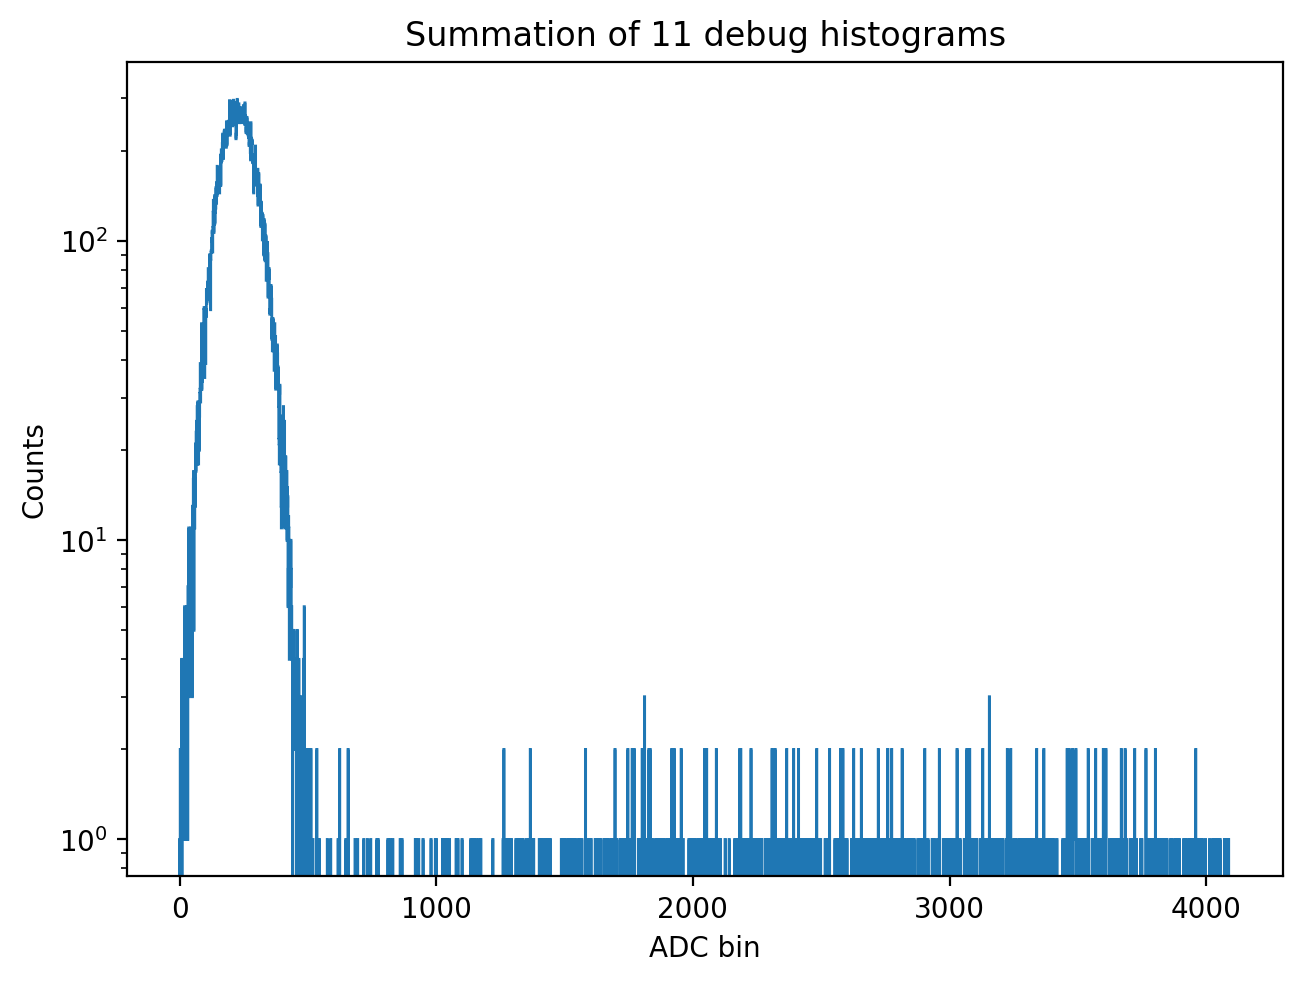

In [50]:
fig, ax = plt.subplots(layout="constrained")
bins = np.arange(total.size + 1)
ax.stairs(total, bins)
ax.set(
    xlabel="ADC bin",
    ylabel="Counts",
    title=f"Summation of {len(decoded)} debug histograms",
    yscale="log",
)